In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
path = "/content/drive/MyDrive/legal_text_classification.csv"
input_dataset = pd.read_csv(path)
input_dataset.head(10)

,case_id,case_outcome,case_title,case_text
0,Case1,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,Ordinarily that discretion will be exercised s...
1,Case2,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,The general principles governing the exercise ...
2,Case3,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,Ordinarily that discretion will be exercised s...
3,Case4,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,The general principles governing the exercise ...
4,Case5,cited,Dr Martens Australia Pty Ltd v Figgins Holding...,The preceding general principles inform the ex...
5,Case6,cited,GEC Marconi Systems Pty Ltd v BHP Information ...,I accept that the making of a rolled up offer ...
6,Case7,cited,John S Hayes &amp; Associates Pty Ltd v Kimber...,The preceding general principles inform the ex...
7,Case8,cited,Seven Network Limited v News Limited (2007) 24...,On the question of the level of unreasonablene...
8,Case9,applied,Australian Broadcasting Corporation v O'Neill ...,recent decision of the High Court in Australia...
9,Case10,followed,Hexal Australia Pty Ltd v Roche Therapeutics I...,Hexal Australia Pty Ltd v Roche Therapeutics I...


In [ ]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import warnings

# **Text Preprocessing and Cleaning**

In [ ]:
# Defining a function
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)

    return input_txt

In [ ]:
def remove_pattern(text, pattern):
    if isinstance(text, str):
        return re.sub(pattern, "", text)
    return text

input_dataset['tidy_case_text'] = input_dataset['case_text'].apply(lambda x: remove_pattern(x, r"@[\w]*"))

print(input_dataset['tidy_case_text'])

0        Ordinarily that discretion will be exercised s...
1        The general principles governing the exercise ...
2        Ordinarily that discretion will be exercised s...
3        The general principles governing the exercise ...
4        The preceding general principles inform the ex...
                               ...                        
24980    That is not confined to persons who control th...
24981    Once the threshold prescribed by s 1335 is sat...
24982    Once the threshold prescribed by s 1335 is sat...
24983    Given the extent to which Deumer stands to gai...
24984    In my view, it is clear that the Court may do ...
Name: tidy_case_text, Length: 24985, dtype: object


In [ ]:
def remove_pattern(text, pattern):
    if isinstance(text, str):
        return re.sub(pattern, "", text)
    return text

input_dataset['tidy_case_title'] = input_dataset['case_title'].apply(lambda x: remove_pattern(x, r"@[\w]*"))

print(input_dataset['tidy_case_title'])

0        Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...
1        Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...
2        Colgate Palmolive Co v Cussons Pty Ltd (1993) ...
3        Dais Studio Pty Ltd v Bullett Creative Pty Ltd...
4        Dr Martens Australia Pty Ltd v Figgins Holding...
                               ...                        
24980    Reches Pty Ltd v Tadiran Pty Ltd (1998) 85 FCR...
24981    Sir Lindsay Parkinson &amp; Co Ltd v Triplan L...
24982    Spiel v Commodity Brokers Australia Pty Ltd (I...
24983    Tullock Ltd v Walker (Unreported, Supreme Cour...
24984    Yandil Holdings Pty Ltd v Insurance Co of Nort...
Name: tidy_case_title, Length: 24985, dtype: object


## Removing special characters, numbers, and punctuation

In [ ]:
# Removing special characters, numbers, and punctuation from case_text column
input_dataset['tidy_case_text'] = input_dataset['tidy_case_text'].apply(
    lambda x: re.sub(r'[^a-zA-Z\s]', '', x) if isinstance(x, str) else x
)

# Removing extra spaces resulting from the replacement
input_dataset['tidy_case_text'] = input_dataset['tidy_case_text'].apply(
    lambda x: ' '.join(x.split()) if isinstance(x, str) else x
)

# Display the updated DataFrame
print(input_dataset['tidy_case_text'])

0        Ordinarily that discretion will be exercised s...
1        The general principles governing the exercise ...
2        Ordinarily that discretion will be exercised s...
3        The general principles governing the exercise ...
4        The preceding general principles inform the ex...
                               ...                        
24980    That is not confined to persons who control th...
24981    Once the threshold prescribed by s is satisfie...
24982    Once the threshold prescribed by s is satisfie...
24983    Given the extent to which Deumer stands to gai...
24984    In my view it is clear that the Court may do s...
Name: tidy_case_text, Length: 24985, dtype: object


In [ ]:
# Removing special characters, numbers, and punctuation from case_title column
input_dataset['tidy_case_title'] = input_dataset['tidy_case_title'].apply(
    lambda x: re.sub(r'[^a-zA-Z\s]', '', x) if isinstance(x, str) else x
)

# Removing extra spaces resulting from the replacement
input_dataset['tidy_case_title'] = input_dataset['tidy_case_title'].apply(
    lambda x: ' '.join(x.split()) if isinstance(x, str) else x
)

# Display the updated DataFrame
print(input_dataset['tidy_case_title'])

0        Alpine Hardwood Aust Pty Ltd v Hardys Pty Ltd ...
1                                  Black v Lipovac FCA ALR
2               Colgate Palmolive Co v Cussons Pty Ltd FCR
3        Dais Studio Pty Ltd v Bullett Creative Pty Ltd...
4        Dr Martens Australia Pty Ltd v Figgins Holding...
                               ...                        
24980                 Reches Pty Ltd v Tadiran Pty Ltd FCR
24981    Sir Lindsay Parkinson amp Co Ltd v Triplan Ltd QB
24982    Spiel v Commodity Brokers Australia Pty Ltd In...
24983    Tullock Ltd v Walker Unreported Supreme Court ...
24984    Yandil Holdings Pty Ltd v Insurance Co of Nort...
Name: tidy_case_title, Length: 24985, dtype: object


## Removing Shortwords

In [ ]:
# Removing short words from case_text column
input_dataset['tidy_case_text'] = input_dataset['tidy_case_text'].apply(
    lambda x: ' '.join([w for w in x.split() if len(w) > 3]) if isinstance(x, str) else x
)

# Display the updated DataFrame
print(input_dataset['tidy_case_text'])

0        Ordinarily that discretion will exercised that...
1        general principles governing exercise discreti...
2        Ordinarily that discretion will exercised that...
3        general principles governing exercise discreti...
4        preceding general principles inform exercise d...
                               ...                        
24980    That confined persons control company extends ...
24981    Once threshold prescribed satisfied discretion...
24982    Once threshold prescribed satisfied discretion...
24983    Given extent which Deumer stands gain from pro...
24984    view clear that Court There number cases where...
Name: tidy_case_text, Length: 24985, dtype: object


In [ ]:
# Removing short words from case_title column
input_dataset['tidy_case_title'] = input_dataset['tidy_case_title'].apply(
    lambda x: ' '.join([w for w in x.split() if len(w) > 3]) if isinstance(x, str) else x
)

# Display the updated DataFrame
print(input_dataset['tidy_case_title'])

0                              Alpine Hardwood Aust Hardys
1                                            Black Lipovac
2                                Colgate Palmolive Cussons
3                             Dais Studio Bullett Creative
4                       Martens Australia Figgins Holdings
                               ...                        
24980                                       Reches Tadiran
24981                            Lindsay Parkinson Triplan
24982               Spiel Commodity Brokers Australia SASR
24983    Tullock Walker Unreported Supreme Court South ...
24984         Yandil Holdings Insurance North America ACLC
Name: tidy_case_title, Length: 24985, dtype: object


In [ ]:
input_dataset.head()

,case_id,case_outcome,case_title,case_text,tidy_case_text,tidy_case_title
0,Case1,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,Ordinarily that discretion will be exercised s...,Ordinarily that discretion will exercised that...,Alpine Hardwood Aust Hardys
1,Case2,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,The general principles governing the exercise ...,general principles governing exercise discreti...,Black Lipovac
2,Case3,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,Ordinarily that discretion will be exercised s...,Ordinarily that discretion will exercised that...,Colgate Palmolive Cussons
3,Case4,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,The general principles governing the exercise ...,general principles governing exercise discreti...,Dais Studio Bullett Creative
4,Case5,cited,Dr Martens Australia Pty Ltd v Figgins Holding...,The preceding general principles inform the ex...,preceding general principles inform exercise d...,Martens Australia Figgins Holdings


## Lowercasing

In [ ]:
# Convert all words in the 'case_text' column to lowercase
input_dataset['tidy_case_text'] = input_dataset['tidy_case_text'].str.lower()

# Display the modified DataFrame
print(input_dataset['tidy_case_text'])

0        ordinarily that discretion will exercised that...
1        general principles governing exercise discreti...
2        ordinarily that discretion will exercised that...
3        general principles governing exercise discreti...
4        preceding general principles inform exercise d...
                               ...                        
24980    that confined persons control company extends ...
24981    once threshold prescribed satisfied discretion...
24982    once threshold prescribed satisfied discretion...
24983    given extent which deumer stands gain from pro...
24984    view clear that court there number cases where...
Name: tidy_case_text, Length: 24985, dtype: object


In [ ]:
# Convert all words in the 'case_title' column to lowercase
input_dataset['tidy_case_title'] = input_dataset['tidy_case_title'].str.lower()

# Display the modified DataFrame
print(input_dataset['tidy_case_title'])

0                              alpine hardwood aust hardys
1                                            black lipovac
2                                colgate palmolive cussons
3                             dais studio bullett creative
4                       martens australia figgins holdings
                               ...                        
24980                                       reches tadiran
24981                            lindsay parkinson triplan
24982               spiel commodity brokers australia sasr
24983    tullock walker unreported supreme court south ...
24984         yandil holdings insurance north america aclc
Name: tidy_case_title, Length: 24985, dtype: object


In [ ]:
# Now we have all the data in lowercase, without short words, punctuation, numbers and special characters
input_dataset.head()

,case_id,case_outcome,case_title,case_text,tidy_case_text,tidy_case_title
0,Case1,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,Ordinarily that discretion will be exercised s...,ordinarily that discretion will exercised that...,alpine hardwood aust hardys
1,Case2,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,The general principles governing the exercise ...,general principles governing exercise discreti...,black lipovac
2,Case3,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,Ordinarily that discretion will be exercised s...,ordinarily that discretion will exercised that...,colgate palmolive cussons
3,Case4,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,The general principles governing the exercise ...,general principles governing exercise discreti...,dais studio bullett creative
4,Case5,cited,Dr Martens Australia Pty Ltd v Figgins Holding...,The preceding general principles inform the ex...,preceding general principles inform exercise d...,martens australia figgins holdings


# **Tokenization**

In [ ]:
# Tokenization of the case_text column
tokenized_case_text = input_dataset['tidy_case_text'].apply(lambda x: x.split() if isinstance(x, str) else [])

# Display the tokenized text
tokenized_case_text.head()

,tidy_case_text
0,"[ordinarily, that, discretion, will, exercised..."
1,"[general, principles, governing, exercise, dis..."
2,"[ordinarily, that, discretion, will, exercised..."
3,"[general, principles, governing, exercise, dis..."
4,"[preceding, general, principles, inform, exerc..."


In [ ]:
# Tokenization of the case_title column
tokenized_case_title = input_dataset['tidy_case_title'].apply(lambda x: x.split() if isinstance(x, str) else [])

# Display the tokenized text
tokenized_case_title.head()

,tidy_case_title
0,"[alpine, hardwood, aust, hardys]"
1,"[black, lipovac]"
2,"[colgate, palmolive, cussons]"
3,"[dais, studio, bullett, creative]"
4,"[martens, australia, figgins, holdings]"


# **Stemming**

In [ ]:
#Stemming the tokens in case_text column
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_case_text = tokenized_case_text.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_case_text.head()

,tidy_case_text
0,"[ordinarili, that, discret, will, exercis, tha..."
1,"[gener, principl, govern, exercis, discret, aw..."
2,"[ordinarili, that, discret, will, exercis, tha..."
3,"[gener, principl, govern, exercis, discret, aw..."
4,"[preced, gener, principl, inform, exercis, dis..."


In [ ]:
#Stemming the tokens in case_title column
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_case_title = tokenized_case_title.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_case_title.head()

,tidy_case_title
0,"[alpin, hardwood, aust, hardi]"
1,"[black, lipovac]"
2,"[colgat, palmol, cusson]"
3,"[dai, studio, bullett, creativ]"
4,"[marten, australia, figgin, hold]"


In [ ]:
# Stitching the tokens back together in case_text column
for i in range(len(tokenized_case_text)):
    tokenized_case_text[i] = ' '.join(tokenized_case_text[i])

input_dataset['tidy_case_text'] = tokenized_case_text
print(input_dataset['tidy_case_text'])

0        ordinarili that discret will exercis that cost...
1        gener principl govern exercis discret award in...
2        ordinarili that discret will exercis that cost...
3        gener principl govern exercis discret award in...
4        preced gener principl inform exercis discret t...
                               ...                        
24980    that confin person control compani extend thos...
24981    onc threshold prescrib satisfi discret whether...
24982    onc threshold prescrib satisfi discret whether...
24983    given extent which deumer stand gain from proc...
24984    view clear that court there number case where ...
Name: tidy_case_text, Length: 24985, dtype: object


In [ ]:
# Stitching the tokens back together in case_title column
for i in range(len(tokenized_case_title)):
    tokenized_case_title[i] = ' '.join(tokenized_case_title[i])

input_dataset['tidy_case_title'] = tokenized_case_title
print(input_dataset['tidy_case_title'])

0                                alpin hardwood aust hardi
1                                            black lipovac
2                                     colgat palmol cusson
3                               dai studio bullett creativ
4                             marten australia figgin hold
                               ...                        
24980                                         rech tadiran
24981                            lindsay parkinson triplan
24982                   spiel commod broker australia sasr
24983    tullock walker unreport suprem court south wal...
24984                 yandil hold insur north america aclc
Name: tidy_case_title, Length: 24985, dtype: object


# **Named Entity Recognition**

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 111.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
#NER for case_text column
import spacy
from tqdm import tqdm

# Load spaCy's English NER model
nlp = spacy.load("en_core_web_sm", disable=["tagger", "parser"])  # Disabling unnecessary components speeds things up

# Function to process a batch of texts for NER
def get_named_entities_batch(texts):
    docs = nlp.pipe(texts, batch_size=32)  # Adjust batch_size for optimal speed
    return [[(ent.text, ent.label_) for ent in doc.ents] for doc in docs]

# Create an empty list to store named entities
named_entities = []

# Process the dataset in chunks and extract named entities
chunk_size = 1000  # Adjust based on your dataset size
for i in tqdm(range(0, len(input_dataset), chunk_size)):
    batch_texts = input_dataset['tidy_case_text'].iloc[i:i + chunk_size].fillna('').tolist()
    batch_entities = get_named_entities_batch(batch_texts)
    named_entities.extend(batch_entities)

# Assign the collected named entities to the DataFrame
input_dataset['named_entities'] = named_entities

# Display the updated DataFrame
print(input_dataset[['tidy_case_text', 'named_entities']].head())

  0%|          | 0/25 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
100%|██████████| 25/25 [08:36<00:00, 20.67s/it]

                                      tidy_case_text  \
0  ordinarili that discret will exercis that cost...   
1  gener principl govern exercis discret award in...   
2  ordinarili that discret will exercis that cost...   
3  gener principl govern exercis discret award in...   
4  preced gener principl inform exercis discret t...   

                                      named_entities  
0                         [(hardi weinberg, PERSON)]  
1                                [(jessup dai, ORG)]  
2                         [(hardi weinberg, PERSON)]  
3                                [(jessup dai, ORG)]  
4  [(john hay, PERSON), (associ kimberlyclark aus...  


In [ ]:
#NER for case_title column
import spacy
from tqdm import tqdm

# Load spaCy's English NER model
nlp = spacy.load("en_core_web_sm", disable=["tagger", "parser"])  # Disabling unnecessary components speeds things up

# Function to process a batch of texts for NER
def get_named_entities_batch(texts):
    docs = nlp.pipe(texts, batch_size=32)  # Adjust batch_size for optimal speed
    return [[(ent.text, ent.label_) for ent in doc.ents] for doc in docs]

# Create an empty list to store named entities
named_entities = []

# Process the dataset in chunks and extract named entities
chunk_size = 1000  # Adjust based on your dataset size
for i in tqdm(range(0, len(input_dataset), chunk_size)):
    batch_texts = input_dataset['tidy_case_title'].iloc[i:i + chunk_size].fillna('').tolist()
    batch_entities = get_named_entities_batch(batch_texts)
    named_entities.extend(batch_entities)

# Assign the collected named entities to the DataFrame
input_dataset['named_entities'] = named_entities

# Display the updated DataFrame
print(input_dataset[['tidy_case_title', 'named_entities']].head())

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)
  0%|          | 0/25 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
100%|██████████| 25/25 [00:48<00:00,  1.93s/it]

                tidy_case_title                 named_entities
0     alpin hardwood aust hardi     [(alpin hardwood, PERSON)]
1                 black lipovac                             []
2          colgat palmol cusson  [(colgat palmol cusson, ORG)]
3    dai studio bullett creativ                   [(dai, ORG)]
4  marten australia figgin hold                             []


# **Dependency Parsing**

In [ ]:
#Dependecy parsing for case_text column
import spacy
from tqdm import tqdm

# Load spaCy's English model with the parser enabled
nlp = spacy.load("en_core_web_sm", disable=["ner", "tagger"])

# Function to extract dependency parse information
def get_dependency_parse(texts):
    docs = nlp.pipe(texts, batch_size=32)  # Adjust batch_size for optimal speed
    # For each doc, extract words with their dependency relations
    return [[(token.text, token.dep_, token.head.text) for token in doc] for doc in docs]

# Process in chunks to avoid memory issues with large datasets
chunk_size = 1000  # Adjust based on dataset size
dependency_parses = []

for i in tqdm(range(0, len(input_dataset), chunk_size)):
    batch_texts = input_dataset['tidy_case_text'].iloc[i:i + chunk_size].fillna('').tolist()
    batch_parses = get_dependency_parse(batch_texts)
    dependency_parses.extend(batch_parses)

# Add the dependency parses to the DataFrame
input_dataset['dependency_parse'] = dependency_parses

# Display the updated DataFrame
print(input_dataset[['tidy_case_text', 'dependency_parse']].head())


/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)
  0%|          | 0/25 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
100%|██████████| 25/25 [06:19<00:00, 15.17s/it]

                                      tidy_case_text  \
0  ordinarili that discret will exercis that cost...   
1  gener principl govern exercis discret award in...   
2  ordinarili that discret will exercis that cost...   
3  gener principl govern exercis discret award in...   
4  preced gener principl inform exercis discret t...   

                                    dependency_parse  
0  [(ordinarili, nmod, hardwood), (that, mark, ex...  
1  [(gener, compound, principl), (principl, nsubj...  
2  [(ordinarili, nmod, hardwood), (that, mark, ex...  
3  [(gener, compound, principl), (principl, nsubj...  
4  [(preced, csubj, said), (gener, compound, prin...  


In [ ]:
#Dependency parsing for case_title column
import spacy
from tqdm import tqdm

# Load spaCy's English model with the parser enabled
nlp = spacy.load("en_core_web_sm", disable=["ner", "tagger"])

# Function to extract dependency parse information
def get_dependency_parse(texts):
    docs = nlp.pipe(texts, batch_size=32)  # Adjust batch_size for optimal speed
    # For each doc, extract words with their dependency relations
    return [[(token.text, token.dep_, token.head.text) for token in doc] for doc in docs]

# Process in chunks to avoid memory issues with large datasets
chunk_size = 1000  # Adjust based on dataset size
dependency_parses = []

for i in tqdm(range(0, len(input_dataset), chunk_size)):
    batch_texts = input_dataset['tidy_case_title'].iloc[i:i + chunk_size].fillna('').tolist()
    batch_parses = get_dependency_parse(batch_texts)
    dependency_parses.extend(batch_parses)

# Add the dependency parses to the DataFrame
input_dataset['dependency_parse'] = dependency_parses

# Display the updated DataFrame
print(input_dataset[['tidy_case_title', 'dependency_parse']].head())


/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)
  0%|          | 0/25 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
100%|██████████| 25/25 [00:13<00:00,  1.91it/s]


                tidy_case_title  \
0     alpin hardwood aust hardi   
1                 black lipovac   
2          colgat palmol cusson   
3    dai studio bullett creativ   
4  marten australia figgin hold   

                                    dependency_parse  
0  [(alpin, compound, hardwood), (hardwood, compo...  
1  [(black, amod, lipovac), (lipovac, ROOT, lipov...  
2  [(colgat, compound, cusson), (palmol, compound...  
3  [(dai, compound, studio), (studio, nsubj, bull...  
4  [(marten, compound, figgin), (australia, compo...  


# **Contextual Embedding**

In [ ]:
!pip install transformers

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel
from tqdm import tqdm

# Load DistilBERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = AutoModel.from_pretrained("distilbert-base-uncased")

# Ensure we're using the GPU if available for faster computation
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Function to generate embeddings for a batch of texts
def get_contextual_embeddings(texts):
    # Tokenize and get embeddings in a batch
    encoded_inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt", max_length=128)
    input_ids = encoded_inputs["input_ids"].to(device)
    attention_mask = encoded_inputs["attention_mask"].to(device)

    with torch.no_grad():
        # Get the model's last hidden states
        outputs = model(input_ids, attention_mask=attention_mask)
        embeddings = outputs.last_hidden_state.mean(dim=1)  # Mean pooling to get a single embedding per text

    return embeddings.cpu().numpy()

# Process in manageable chunks
chunk_size = 100  # Adjust based on your GPU/CPU memory capacity
contextual_embeddings = []

for i in tqdm(range(0, len(input_dataset), chunk_size)):
    batch_texts = input_dataset['tidy_case_text'].iloc[i:i + chunk_size].fillna('').tolist()
    batch_embeddings = get_contextual_embeddings(batch_texts)
    contextual_embeddings.extend(batch_embeddings)

# Add the embeddings to the DataFrame
input_dataset['contextual_embedding'] = list(contextual_embeddings)

# Display the updated DataFrame
print(input_dataset[['tidy_case_text', 'contextual_embedding']].head())

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

100%|██████████| 250/250 [01:48<00:00,  2.30it/s]

                                      tidy_case_text  \
0  ordinarili that discret will exercis that cost...   
1  gener principl govern exercis discret award in...   
2  ordinarili that discret will exercis that cost...   
3  gener principl govern exercis discret award in...   
4  preced gener principl inform exercis discret t...   

                                contextual_embedding  
0  [-0.15637931, -0.16533057, 0.34378076, -0.0277...  
1  [-0.2548375, -0.11163644, 0.2863577, -0.019673...  
2  [-0.15637931, -0.16533057, 0.34378076, -0.0277...  
3  [-0.2548375, -0.11163644, 0.2863577, -0.019673...  
4  [-0.11939104, -0.12880498, 0.31595707, -0.0583...  


In [ ]:
# Contextual Embedding for case_title column
import torch
from transformers import AutoTokenizer, AutoModel
from tqdm import tqdm

# Load DistilBERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = AutoModel.from_pretrained("distilbert-base-uncased")

# Ensure we're using the GPU if available for faster computation
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Function to generate embeddings for a batch of texts
def get_contextual_embeddings(texts):
    # Tokenize and get embeddings in a batch
    encoded_inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt", max_length=128)
    input_ids = encoded_inputs["input_ids"].to(device)
    attention_mask = encoded_inputs["attention_mask"].to(device)

    with torch.no_grad():
        # Get the model's last hidden states
        outputs = model(input_ids, attention_mask=attention_mask)
        embeddings = outputs.last_hidden_state.mean(dim=1)  # Mean pooling to get a single embedding per text

    return embeddings.cpu().numpy()

# Process in manageable chunks
chunk_size = 100  # Adjust based on your GPU/CPU memory capacity
contextual_embeddings = []

for i in tqdm(range(0, len(input_dataset), chunk_size)):
    batch_texts = input_dataset['tidy_case_title'].iloc[i:i + chunk_size].fillna('').tolist()
    batch_embeddings = get_contextual_embeddings(batch_texts)
    contextual_embeddings.extend(batch_embeddings)

# Add the embeddings to the DataFrame
input_dataset['contextual_embedding'] = list(contextual_embeddings)

# Display the updated DataFrame
print(input_dataset[['tidy_case_title', 'contextual_embedding']].head())

100%|██████████| 250/250 [00:18<00:00, 13.20it/s]


                tidy_case_title  \
0     alpin hardwood aust hardi   
1                 black lipovac   
2          colgat palmol cusson   
3    dai studio bullett creativ   
4  marten australia figgin hold   

                                contextual_embedding  
0  [-0.16451992, -0.032694533, 0.07792999, -0.081...  
1  [-0.1087601, -0.114627406, -0.25581568, -0.124...  
2  [-0.13103352, 0.17075895, 0.20623302, -0.06388...  
3  [0.07292213, 0.06132278, 0.09447564, 0.0704682...  
4  [0.05269916, 0.027991815, -0.016846407, 0.0713...  


# **Insertion of Bias Labels in the dataset**

In [ ]:
from transformers import pipeline
from tqdm import tqdm

# Load the classifier
classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Define the classify_bias function
def classify_bias(text):
    result = classifier(text[:512])  # Limit input length for efficiency
    label = result[0]['label']
    return 1 if label == 'NEGATIVE' else 0

# Apply the classification in batches
batch_size = 500  # Adjust batch size based on available memory
bias_labels = []

for i in tqdm(range(0, len(input_dataset), batch_size)):
    batch_texts = input_dataset['tidy_case_text'][i:i+batch_size].tolist()
    batch_labels = [classify_bias(text) for text in batch_texts]
    bias_labels.extend(batch_labels)

# As4k to the dataset
input_dataset['bias_label'] = bias_labels

# Display the updated DataFrame
print(input_dataset[['tidy_case_text', 'bias_label']].head())

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
100%|██████████| 50/50 [57:19<00:00, 68.79s/it]

                                      tidy_case_text  bias_label
0  ordinarili that discret will exercis that cost...           1
1  gener principl govern exercis discret award in...           1
2  ordinarili that discret will exercis that cost...           1
3  gener principl govern exercis discret award in...           1
4  preced gener principl inform exercis discret t...           1


# **Splitting Data into Training and Testing Set**

In [ ]:
from sklearn.model_selection import train_test_split

train_texts, test_texts, train_labels, test_labels = train_test_split(
    input_dataset['tidy_case_text'], input_dataset['bias_label'], test_size=0.2, random_state=42
)

# **Tokenizing Data for Model Training**

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(list(test_texts), truncation=True, padding=True, max_length=512)

# **Creating a PyTorch Dataset Class**

In [ ]:
import torch
from torch.utils.data import Dataset

class BiasDetectionDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = BiasDetectionDataset(train_encodings, train_labels)
test_dataset = BiasDetectionDataset(test_encodings, test_labels)

# **Setting Up and Training a Pretrained Model**

In [ ]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments
from transformers import DataCollatorWithPadding
import torch

# Load pretrained model
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

# Setup training arguments, disabling W&B logging by setting `report_to`
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    report_to="none",  # Disables W&B logging
)

# Data collator for padding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Pass datasets directly
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    data_collator=data_collator,
    tokenizer=tokenizer,
)

# Train the model
try:
    trainer.train()
except KeyError as e:
    print("Encountered a KeyError:", e)
    print("Make sure train_dataset and test_dataset are properly formatted and indexed.")

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-34-bcff0a5f041d>:23: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Encountered a KeyError: 3302
Make sure train_dataset and test_dataset are properly formatted and indexed.


# **Evaluating the Model**

In [ ]:
print(len(test_dataset))  # Should output a positive integer

4997


In [ ]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import torch
from torch.utils.data import Dataset

# Load your dataset (replace this line with how you are loading your dataset)
# Assuming `input_dataset` is already loaded and is a DataFrame with columns `tidy_case_text` and `bias_label`
# Example:
# input_dataset = pd.read_csv("your_dataset.csv")

# Debugging: Check the integrity of the dataset
print("Initial Dataset Head:")
print(input_dataset.head())

# Resetting the index to ensure alignment
input_dataset = input_dataset.reset_index(drop=True)

# Debugging: Check if there are any NaN values or other potential issues
print("Checking for missing values:")
print(input_dataset.isnull().sum())

# Initialize the tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

# Define the LegalDataset class with error-checking
class LegalDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        if len(texts) != len(labels):
            raise ValueError("The number of texts and labels must be the same.")
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        # Debugging: Check if index is out of bounds
        if idx >= len(self.texts) or idx < 0:
            raise IndexError(f"Index {idx} is out of bounds for dataset with length {len(self.texts)}.")

        try:
            text = self.texts[idx]
            label = self.labels[idx]
        except IndexError as e:
            print(f"Error accessing index {idx}: {e}")
            raise

        encoding = self.tokenizer(
            text,
            truncation=True,
            max_length=self.max_length,
            padding='max_length',
            return_tensors="pt"
        )
        encoding = {key: val.squeeze() for key, val in encoding.items()}  # Remove extra batch dimension
        encoding['labels'] = torch.tensor(label, dtype=torch.long)
        return encoding

# Define a function to compute a single metric (e.g., accuracy)
def compute_metrics(pred):
    predictions, labels = pred
    preds = np.argmax(predictions, axis=1)
    accuracy = accuracy_score(labels, preds)
    return {"accuracy": accuracy}

# Load the pre-trained model
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

# Define training arguments with simplified evaluation
training_args = TrainingArguments(
    output_dir='./results',
    eval_strategy="epoch",  # Use 'eval_strategy' instead of 'evaluation_strategy'
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    report_to="none",  # Disables W&B logging
    logging_dir='./logs',  # Directory for storing logs
    logging_steps=500,     # Reduce logging frequency if needed
    save_strategy="epoch", # Save model after each epoch for stability
)

# Check if dataset columns are as expected
if 'tidy_case_text' not in input_dataset.columns or 'bias_label' not in input_dataset.columns:
    raise ValueError("Dataset does not have the required columns: 'tidy_case_text' and 'bias_label'")

# Split the dataset into training and testing
train_texts, test_texts, train_labels, test_labels = train_test_split(
    input_dataset['tidy_case_text'].tolist(),
    input_dataset['bias_label'].tolist(),
    test_size=0.2,  # Adjust the split size as needed
    random_state=42
)

# Create dataset instances for training and testing
train_dataset = LegalDataset(train_texts, train_labels, tokenizer)
test_dataset = LegalDataset(test_texts, test_labels, tokenizer)

# Debugging: Display dataset sizes
print(f"Training set size: {len(train_dataset)}")
print(f"Test set size: {len(test_dataset)}")

# Initialize the Trainer with the evaluation dataset
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,  # Now includes evaluation dataset
    compute_metrics=compute_metrics  # Only compute accuracy
)

# Train the model
trainer.train()

# Evaluate the model (only accuracy will be computed)
try:
    eval_results = trainer.evaluate()
    print("Evaluation Results:", eval_results)
except Exception as e:
    print(f"Error during evaluation: {e}")


Initial Dataset Head:
  case_id case_outcome                                         case_title  \
0   Case1        cited  Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...   
1   Case2        cited  Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...   
2   Case3        cited  Colgate Palmolive Co v Cussons Pty Ltd (1993) ...   
3   Case4        cited  Dais Studio Pty Ltd v Bullett Creative Pty Ltd...   
4   Case5        cited  Dr Martens Australia Pty Ltd v Figgins Holding...   

                                           case_text  \
0  Ordinarily that discretion will be exercised s...   
1  The general principles governing the exercise ...   
2  Ordinarily that discretion will be exercised s...   
3  The general principles governing the exercise ...   
4  The preceding general principles inform the ex...   

                                      tidy_case_text  \
0  ordinarili that discret will exercis that cost...   
1  gener principl govern exercis discret award in...   
2  ordinar

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Training set size: 19988
Test set size: 4997


Epoch,Training Loss,Validation Loss,Accuracy
1,0.038200,0.047843,0.991995


Epoch,Training Loss,Validation Loss,Accuracy
1,0.038200,0.047843,0.991995
2,0.044500,0.055471,0.991595
3,0.038600,0.053191,0.991995


Evaluation Results: {'eval_loss': 0.05319065600633621, 'eval_accuracy': 0.991995197118271, 'eval_runtime': 76.0915, 'eval_samples_per_second': 65.671, 'eval_steps_per_second': 8.214, 'epoch': 3.0}


# **Analyzing Misclassifications**

In [ ]:
import pandas as pd

predictions = trainer.predict(test_dataset)
predicted_labels = torch.argmax(torch.tensor(predictions.predictions), axis=1)

# Combine texts, actual, and predicted labels for review
result_df = pd.DataFrame({'text': test_texts, 'actual_label': test_labels, 'predicted_label': predicted_labels})
misclassified = result_df[result_df['actual_label'] != result_df['predicted_label']]
print(misclassified.head())

Epoch,Training Loss,Validation Loss


                                                  text  actual_label  \
272  merit substant applic taken into consider hunt...             0   
274  well recognis that claim legal profession priv...             0   
302  power confer court broad scope foreshadow repo...             0   
318  satisfi that alleg fraud against bangad suzlon...             0   
523  basi longstand author mchugh adopt approach th...             0   

     predicted_label  
272                1  
274                1  
302                1  
318                1  
523                1  


# **Saving the Model**

In [ ]:
model.save_pretrained("./bias_detection_model")
tokenizer.save_pretrained("./bias_detection_model")

('./bias_detection_model/tokenizer_config.json',
 './bias_detection_model/special_tokens_map.json',
 './bias_detection_model/vocab.txt',
 './bias_detection_model/added_tokens.json',
 './bias_detection_model/tokenizer.json')

# **Making Predictions on the Test Set**

In [ ]:
import torch
from tqdm import tqdm
from torch.utils.data import DataLoader

# Define the device (use GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create a DataLoader for the test dataset
test_dataloader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Move the model to the appropriate device
model.to(device)

# Put the model in evaluation mode
model.eval()

# Initialize lists to store true labels and predictions
true_labels = []
predictions = []

# Loop over test data in batches for efficiency
with torch.no_grad():
    for batch in tqdm(test_dataloader):  # Use a DataLoader for the test set
        # Move batch to the same device as the model
        inputs = {key: val.to(device) for key, val in batch.items() if key != 'labels'}
        labels = batch['labels'].to(device)

        # Get predictions
        outputs = model(**inputs)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1).cpu().numpy()

        # Store predictions and true labels
        predictions.extend(preds)
        true_labels.extend(labels.cpu().numpy())

# Now `true_labels` and `predictions` contain your true and predicted labels


100%|██████████| 625/625 [01:24<00:00,  7.40it/s]


# **Evaluating Model Performance**

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Calculate accuracy
accuracy = accuracy_score(true_labels, predictions)

# Calculate precision, recall, and F1-score
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predictions, average='binary')  # 'binary' if you have 0 and 1 labels

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9906
Precision: 0.9905
Recall: 1.0000
F1 Score: 0.9953


# **Confusion Matrix**

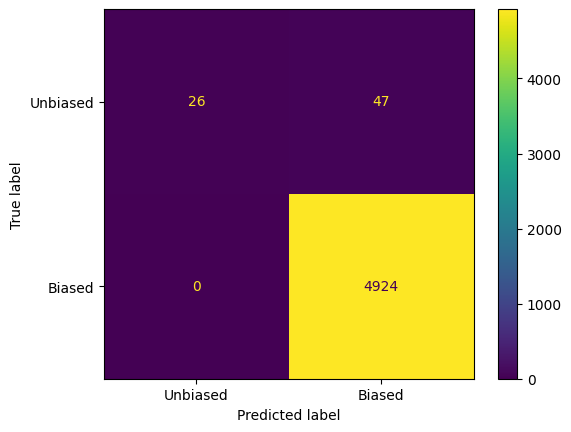

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(true_labels, predictions, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Unbiased', 'Biased'])
disp.plot()

# **ROC-AUC (Receiver Operating Characteristic - Area Under Curve)**

In [ ]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(true_labels, predictions)
print(f"ROC AUC: {auc:.4f}")

ROC AUC: 0.6781


# **Analyzing Results**

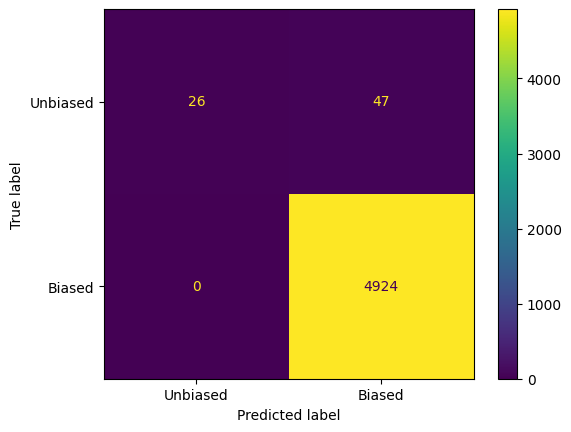

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(true_labels, predictions, labels=[0, 1])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Unbiased', 'Biased'])
disp.plot()